In [1]:
import rebound
print(rebound.__build__)
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Feb 26 2020 16:11:25


In [2]:
Nsteps = 30000
def get():
    sim = rebound.Simulation()
    sim.add(m=1)
    sim.add(a=1,e=0.2,omega=0.,Omega=np.pi,inc=85./180.*np.pi)    
    sim.add(m=1,a=10,e=0.2)
    sim.move_to_com()
    return sim

In [3]:
def runias15():
    sim = get()
    
    times = np.zeros(Nsteps)
    E = np.zeros(len(times))
    p_e = np.zeros(len(times))
    p_inc = np.zeros(len(times))
    Nmaxshellused = np.zeros(len(times))
    E0 = sim.calculate_energy()
    
    for i in range(Nsteps):
        sim.integrate(sim.t+1.3456,exact_finish_time=0)

        Nmaxshellused[i] = sim.ri_mercurana.Nmaxshellused
        sim.ri_mercurana.Nmaxshellused = 1
        times[i] = sim.t
        E[i] = np.abs((E0-sim.calculate_energy())/E0)
        p_e[i] = sim.particles[1].e
        p_inc[i] = sim.particles[1].inc
    return times, Nmaxshellused, E, p_e, p_inc
resias15 = runias15()

In [4]:
def run(settings):
    kappa, phi0, phi1, n0, n1, N_dominant,dt,Nmaxshells = settings
    sim = get()

    sim.ri_mercurana.kappa0 = kappa
    sim.ri_mercurana.phi0 = phi0
    sim.ri_mercurana.phi1 = phi1
    sim.ri_mercurana.n0 = n0
    sim.ri_mercurana.n1 = n1
    sim.ri_mercurana.N_dominant = N_dominant
    sim.ri_mercurana.Nmaxshells = Nmaxshells
    sim.integrator = "mercurana"
    sim.dt = dt

    times = np.zeros(Nsteps)
    E = np.zeros(len(times))
    p_e = np.zeros(len(times))
    p_inc = np.zeros(len(times))
    Nmaxshellused = np.zeros(len(times))
    E0 = sim.calculate_energy()
    
    for i in range(Nsteps):
        sim.integrate(sim.t+1.3456,exact_finish_time=0)

        Nmaxshellused[i] = sim.ri_mercurana.Nmaxshellused
        sim.ri_mercurana.Nmaxshellused = 1
        times[i] = sim.t
        E[i] = np.abs((E0-sim.calculate_energy())/E0)
        p_e[i] = sim.particles[1].e
        p_inc[i] = sim.particles[1].inc
    return times, Nmaxshellused, E, p_e, p_inc

In [6]:
reslf = []
P1t = 1.074162135*np.pi*2.
settingslf = [
    [0, "lf", "none", 0, 0, 0, 1e-6*P1t, 1],            
    [0, "lf", "none", 0, 0, 0, 1e-5*P1t, 1],        
    [0, "lf", "none", 0, 0, 0, 1e-4*P1t, 1],    
    [0, "lf", "none", 0, 0, 0, 1e-3*P1t, 1],
    [0, "lf", "none", 0, 0, 0, 1e-2*P1t, 1],
#    [0, "lf", "none", 0, 0, 0, 0.13/2**2, 1],
#    [0, "lf", "none", 0, 0, 0, 0.13/2**0, 1],
]
for setting in settingslf:
    reslf.append(run(setting))

In [7]:
res = []
settings = [
    [1e-1, "lf", "lf", 2, 2, 0, 0.13, 20],
    [1e-2, "lf", "lf", 2, 2, 0, 0.13, 20],
    [1e-3, "lf", "lf", 2, 2, 0, 0.13, 20],
    [1e-4, "lf", "lf", 2, 2, 0, 0.13, 20],
    [1e-5, "lf", "lf", 2, 2, 0, 0.13, 20],
    #[5e-3, "lf4", "lf4", 2, 2, 0, 0.13],
    #[5e-3, "lf4_2", "lf", 2, 2, 0, 0.13],
]
for setting in settings:
    res.append(run(setting))

1.0
8.0
15.0
18.0
17.0


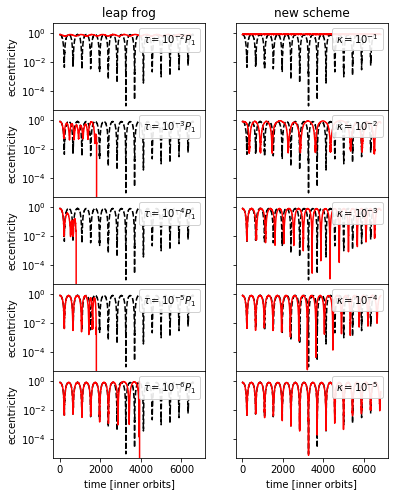

In [13]:
fig, axs = plt.subplots(5,2,figsize=(6,8), sharex=True, sharey=True, gridspec_kw = {'hspace':0})
P0 = np.pi*2.
for _ax in axs:
    _ax[0].set_ylabel("eccentricity")
    for ax in _ax:
        ax.set_ylim([0.5e-5,5.1])
        ax.set_yscale("log")
        times, Nmaxshellused, E, p_e, p_inc = resias15
        ax.plot(times/P0,1.-p_e,ls="--",color="black")    
axs[-1][0].set_xlabel("time [inner orbits]")
axs[-1][1].set_xlabel("time [inner orbits]")

axs[0][0].set_title("leap frog")
axs[0][1].set_title("new scheme")
lines = ["-.",":","-","-.",":"]
for i,setting in enumerate(settingslf):
    kappa, phi0, phi1, n0, n1, N_dominant,dt,Nmaxshells = setting
    times, Nmaxshellused, E, p_e, p_inc = reslf[i]
    axs[4-i][0].plot(times/P0,1.-p_e,label="$\\tau=10^{%d}P_1$"%(np.log10(dt/P1t)),color="red")
    axs[4-i][0].legend(loc="upper right",handletextpad=0.0, handlelength=0,framealpha=0.9)
for i,setting in enumerate(settings):
    kappa, phi0, phi1, n0, n1, N_dominant,dt,Nmaxshells = setting
    times, Nmaxshellused, E, p_e, p_inc = res[i]
    axs[i][1].plot(times/P0,1.-p_e,label="$\kappa=10^{%d}$"%(np.log10(kappa)),color="red")
    axs[i][1].legend(loc="upper right",handletextpad=0.0, handlelength=0,framealpha=0.9)
    print(np.max(Nmaxshellused))
times, Nmaxshellused, E, p_e, p_inc = resias15
plt.savefig("figurekozai.pdf", bbox_inches = 'tight', pad_inches = 0)
os.system("cp figurekozai.pdf ~/papers/mercurana/");